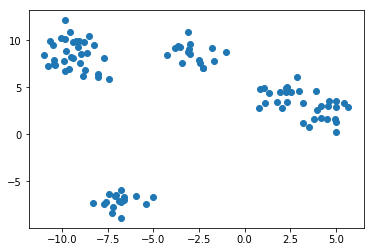

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random

from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=100, centers=6, random_state=42)


plt.scatter(X[:, 0], X[:, 1])

In [13]:
class Cluster:
    
    def __init__(self, name, center):
        self.name = name
        self.center = center
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((self.center - point) ** 2))
    
    def relocate(self):
        if len(self.points) > 0:
            self.center = np.mean(self.points, axis=0)
        self.points = []

class KMeansCustom:
    
    def __init__(self, n_clusters=5, n_init=10, max_iters=300):
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iters = max_iters
        
    def fit(self, X):
        
        timeline_infos = []
        errs = []
        
        for timeline in range(self.n_init):

            clusters = []

            for i in range(self.n_clusters):
                cluster = Cluster(i, random.choice(X))
                clusters.append(cluster)

            for i in range(self.max_iters):

                labels = []

                for point in X:
                    distances = []
                    for cluster in clusters:
                        distance = cluster.distance(point)
                        distances.append(distance)

                    selected = clusters[np.argmin(distances)]
                    labels.append(selected.name)
                    selected.points.append(point)

                for cluster in clusters:
                    cluster.relocate()
                
            err = self.error(clusters, X, labels)
            timeline_infos.append([err, clusters, labels])
            errs.append(err)
        
        err, clusters, labels = timeline_infos[np.argmin(errs)]
        self.labels_ = labels
        self.cluster_centers_ = np.array([cluster.center for cluster in clusters])
        
    def error(self, clusters, X, labels):
        
        err = 0
        
        for point, label in zip(X, labels):
            cluster = clusters[label]
            distance = cluster.distance(point)
            
            err += distance
            
        return err
            
        

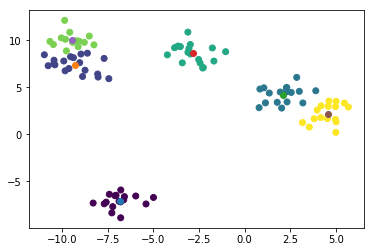

In [16]:
model = KMeansCustom(n_clusters=6, max_iters=10)

model.fit(X)

model.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

for center in model.cluster_centers_:
    plt.scatter(center[0], center[1])